<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Emotions Analysis | DistilBERT-BiGRU</p>

**We will do The Following Tasks in this Notebook to train a Simple RNN & Bidirectional GRU on Emotion Analysis :**

1. Data Preparation: Load textual data and preprocess and clean the texts.
2. Tokenization and Padding.
3. Train a simple RNN & Bidirectional GRU to get good accuracy.
5. Visualize results.
6. evaluations on Test Data.

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">About Dataset</p>

## Introduction:

[`Emotions`](https://www.kaggle.com/datasets/nelgiriyewithana/emotions) – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

## About the Dataset:
<p>Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: 

- sadness (0)
- joy (1)
- love (2) 
- anger (3) 
- fear (4) 
- surprise (5) 

Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.</p>

## Key Features:
- text: A string feature representing the content of the Twitter message.
- label: A classification label indicating the primary emotion, with values ranging from 0 to 5.

## Sample Data:
| text                                           | label |
|------------------------------------------------|-------|
| that was what i felt when i was finally accept…| 1     |
| i take every day as it comes i'm just focussin…| 4     |
| i give you plenty of attention even when i fee…| 0     |

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
from tqdm import tqdm

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Loading Data</p>

In [2]:
# Load Data 
df = pd.read_csv('full.csv')    # Change to use `short.csv` for a short version
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
# Shape Of Data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [4]:
# Count of Null Values 
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [5]:
# Count of Duplicates data
df.duplicated().sum()

0

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Renaming The Columns Names</p>

In [6]:
# Rename Columns 
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Head Of Data
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [8]:
# Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

In [9]:
# Head Of Data
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear
5,i was beginning to feel quite disheartened,Sadness
6,i would think that whomever would be lucky eno...,Love
7,i fear that they won t ever feel that deliciou...,Joy
8,im forever taking some time out to have a lie ...,Surprise
9,i can still lose the weight without feeling de...,Sadness


<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Label Count</p>


/var/folders/n2/jwp2k4ln7b71fdbtbttgjhr40000gn/T/ipykernel_71564/1775318722.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


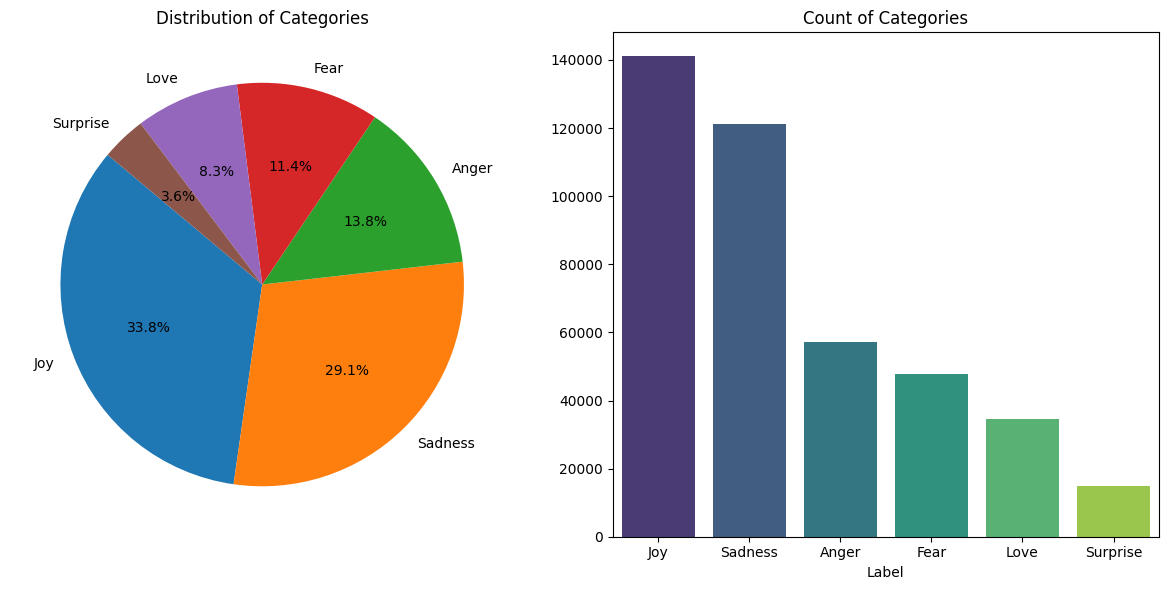

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    416809 non-null  object
 1   Label   416809 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [10]:
# Value Count Of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
df.info()

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Seperate Data Set for Visualization</p>

In [ ]:
# Make Seperate Data Set to Visualize tex
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

In [12]:
print("Number of sadness: " + str(len(df_sadness)))
print("Number of joy: " + str(len(df_joy)))
print("Number of love: " + str(len(df_love)))
print("Number of anger: " + str(len(df_anger)))
print("Number of fear: " + str(len(df_fear)))
print("Number of surprise: " + str(len(df_surprise)))

Number of joy: 141067
Number of sadness: 121187
Number of anger: 57317
Number of fear: 47712
Number of love: 34554
Number of surprise: 14972


<b>The dataset is unbalanced. </b>

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Visualizing Text Using Word Cloud</p>

**A word cloud is a visual representation of text data in which the frequency of each word's occurrence is depicted by the size of the word. Words that appear more frequently in the text are typically displayed with a larger font size, while less frequent words are smaller.**

**Word clouds are often used to quickly and visually summarize the most common words or themes within a large body of text. They are popular in data analysis, text mining, and visualization tasks, as they provide a simple yet effective way to identify patterns and trends in textual data.**

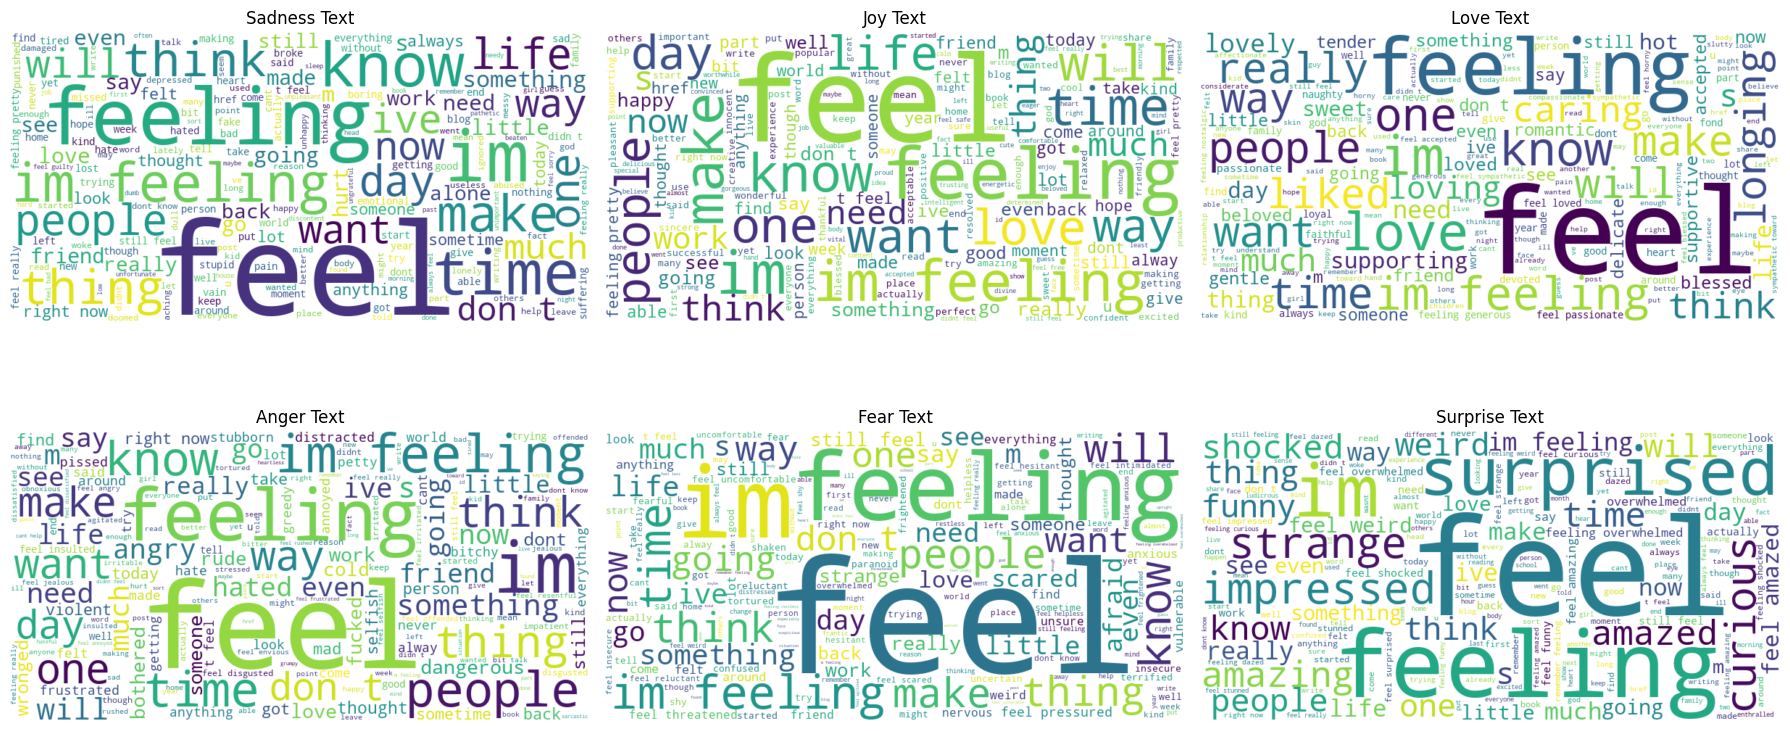

In [13]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Encode Label again</p>

In [14]:
# Now Unrename Label again
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

/var/folders/n2/jwp2k4ln7b71fdbtbttgjhr40000gn/T/ipykernel_71564/488500057.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('Surprise',5)


<p style="font-family: Arial, sans-serif; font-size: 24px; text-align: center; color: #1E90FF;">Text Preprocessing</p>

1. **Remove URLs:** Uses a regular expression to remove URLs from the text data.

2. **Remove special characters and punctuation:** Uses a regular expression to remove any special characters and punctuation marks from the text.

3. **Remove extra whitespaces:** Uses a regular expression to remove extra whitespaces and replace them with a single space.

4. **Remove numeric values:** Uses a regular expression to remove any numeric values from the text.

5. **Lowercasing:** Converts all text to lowercase to ensure consistency.

6. **Remove stop words:** Removes common English stop words, such as "the," "is," "and," etc., using NLTK's stopwords list.

7. **Remove non-alphanumeric characters:** Uses a regular expression to remove any non-alphanumeric characters from the text.

*Overall, these preprocessing steps help clean and normalize the text data, removing noise and ensuring that the data is consistent and suitable for further analysis or modeling tasks.*

In [15]:
# Import Basis Needed Libaries 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download NLTK resources (uncomment the following line if not already downloaded)?
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/lejing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lejing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<p style="font-family: Arial, sans-serif; font-size: 20px; text-align: left; color: #1E90FF;">1. Remove URLs</p>

In [16]:
# Step 1: Remove URLs
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


<p style="font-family: Arial, sans-serif; font-size: 20px; text-align: left; color: #1E90FF;">2. Remove Special Characters and Punctuation</p>

In [17]:
# Step 2: Remove special characters and punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


<p style="font-family: Arial, sans-serif; font-size: 20px; text-align: left; color: #1E90FF;">3. Remove Extra WhiteSpaces</p>

In [18]:
# Step 3: Remove extra whitespaces
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


<p style="font-family: Arial, sans-serif; font-size: 20px; text-align: left; color: #1E90FF;">4. Remove Numeric Values in Text</p>

In [19]:
# Step 4: Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


<p style="font-family: Arial, sans-serif; font-size: 20px; text-align: left; color: #1E90FF;">5. Lower Casing text</p>

In [20]:
# Step 5: Lowercasing
df['Text'] = df['Text'].str.lower()
df.head(10)

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5
9,i can still lose the weight without feeling de...,0


<p style="font-family: Arial, sans-serif; font-size: 20px; text-align: left; color: #1E90FF;">6. Remove Stopwords</p>

In [21]:
# Step 6: Remove stop words
stop = set(stopwords.words('english'))
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df.head(10)

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4
5,beginning feel quite disheartened,0
6,would think whomever would lucky enough stay s...,2
7,fear ever feel delicious excitement christmas ...,1
8,im forever taking time lie feel weird,5
9,still lose weight without feeling deprived,0


<p style="font-family: Arial, sans-serif; font-size: 20px; text-align: left; color: #1E90FF;">7. Remove Non-alpha Numeric</p>

In [22]:
# Step 7: Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df.head(10)

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4
5,beginning feel quite disheartened,0
6,would think whomever would lucky enough stay s...,2
7,fear ever feel delicious excitement christmas ...,1
8,im forever taking time lie feel weird,5
9,still lose weight without feeling deprived,0


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Train Test Split</p>

In [23]:
X = df['Text']
y = df['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y,
#                                                     random_state = 42,
#                                                     test_size = 0.2,
#                                                     shuffle=True)

# X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp,
#                                                 random_state = 42,
#                                                 test_size = 0.5,
#                                                 shuffle=True)

# Print the shapes of the training and testing sets
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
# print("Shape X_val:", X_val.shape)
# print("Shape y_val:", y_val.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (333447,)
Shape y_train: (333447,)
Shape X_test: (83362,)
Shape y_test: (83362,)


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Tokenization and Padding Sequences</p>

1. **Tokenization:** Tokenization is the process of converting text into a sequence of numbers or tokens. The text data in `X_train` and `X_test` is tokenized using the Tokenizer class from Keras. This step converts the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index. The `num_words` parameter limits the vocabulary size to 50,000 most frequent words.

2. **Padding:** Padding is the process of adding zero values to a sequence of words so that all sequences have the same length. This is useful because RNN models require inputs with uniform length. Padding is performed to make the lengths of all sequences the same, regardless of the original length of the sentences. After tokenization, the sequences in `X_train` and `X_test` are padded to ensure uniform length. This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same length (`maxlen`). Padding is done after the sequences to ensure that the actual content of the text is preserved. 

**Overall, the code prepares the text data for further processing and modeling by converting it into tokenized and padded sequences, making it suitable for use in machine learning algorithms such as neural networks.**

In [24]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=50000)
#tokenizer.fit_on_texts(list(X_train) + list(X_val))
tokenizer.fit_on_texts(X_train)

# tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
#X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [25]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [26]:
# Perform padding on X_train, X_val and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
#X_val_padded = pad_sequences(X_val_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train, X_val and X_test
print("X_train_padded:")
print(X_train_padded)
# print("X_val_padded:")
# print(X_val_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   17 27378    69 ...     0     0     0]
 [  273     5   725 ...     0     0     0]
 [    1    44   718 ...     0     0     0]
 ...
 [    1   592     0 ...     0     0     0]
 [    4    15   489 ...     0     0     0]
 [    1   149  1768 ...     0     0     0]]

X_test_padded:
[[  120    40   168 ...     0     0     0]
 [ 3060 13518   795 ...     0     0     0]
 [  187   309    48 ...     0     0     0]
 ...
 [  821   272  1906 ...     0     0     0]
 [ 1861  7347   621 ...     0     0     0]
 [   82     1   410 ...     0     0     0]]


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Input Size</p>

In [27]:
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

50000

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Building: RNN</p>

In [28]:
RNN_model = Sequential()
RNN_model.add(Embedding(input_dim=input_Size, output_dim=32, input_shape=(maxlen,)))

# Dropout
# RNN_model.add(Dropout(0.5))

# Add simple RNN layer
RNN_model.add(SimpleRNN(64))    # Number of units in the RNN layer

# Batch Normalization
RNN_model.add(BatchNormalization())

# Add output layer
RNN_model.add(Dense(6, activation='softmax'))

# Compile the model
RNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

RNN_model.summary()

/Users/lejing/Desktop/nlpclass-1241-g-Fighting/project/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 79, 32)         │     1,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,606,854 (6.13 MB)

 Trainable params: 1,606,726 (6.13 MB)

 Non-trainable params: 128 (512.00 B)

In [29]:
history = RNN_model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

# Model Train 
# history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5
 19/223 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.2604 - loss: 1.8608

223/223 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.3254 - loss: 1.6857 - val_accuracy: 0.3379 - val_loss: 1.5755
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.3379 - loss: 1.5720 - val_accuracy: 0.3379 - val_loss: 1.5745
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.3391 - loss: 1.5717 - val_accuracy: 0.3379 - val_loss: 1.5746
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.3390 - loss: 1.5727 - val_accuracy: 0.3379 - val_loss: 1.5745
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.3380 - loss: 1.5739 - val_accuracy: 0.3379 - val_loss: 1.5743


In [30]:
# Evaluate Test Data 
RNN_model.evaluate(X_test_padded, y_test)

 263/2606 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3383 - loss: 1.5777

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3395 - loss: 1.5745


[1.5744553804397583, 0.33785179257392883]

 308/2606 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
(83362, 6)
(83362,)
Accuracy: 0.3378517789880281
Precision: 0.11414382456537539
Recall: 0.3378517789880281
F1 Score: 0.17063747473089366

Confusion Matrix:
 [[    0 24201     0     0     0     0]
 [    0 28164     0     0     0     0]
 [    0  6929     0     0     0     0]
 [    0 11441     0     0     0     0]
 [    0  9594     0     0     0     0]
 [    0  3033     0     0     0     0]]


/Users/lejing/Desktop/nlpclass-1241-g-Fighting/project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

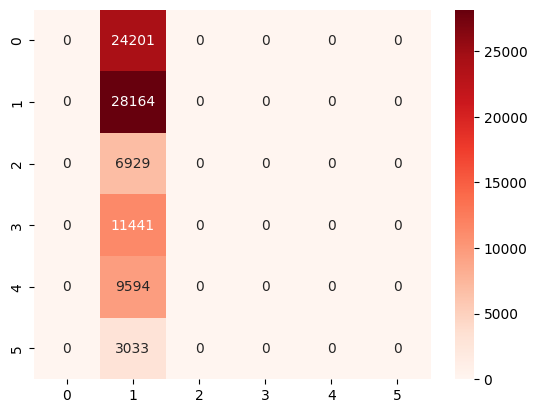

In [31]:
# Predictions on test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = RNN_model.predict(X_test_padded)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred.shape)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')

In [32]:
#y_pred = RNN_model.predict(X_test_padded)

In [33]:
#threshold = 0.5
##y_pred_binary = (y_pred > threshold).astype(int)
#y_pred_binary = y_pred_binary.flatten()
#y_pred_binary

In [34]:
#y_test_binary = y_test.values
#y_test_binary

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculating metrics
#accuracy = accuracy_score(y_test_binary, y_pred_binary)
#precision = precision_score(y_test_binary, y_pred_binary)
#recall = recall_score(y_test_binary, y_pred_binary)
#f1 = f1_score(y_test_binary, y_pred_binary)
#roc_auc = roc_auc_score(y_test_binary, y_pred)

# Calculating confusion matrix
#conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Displaying results
#print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)
#print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)
#print("\nConfusion Matrix:\n", conf_matrix)

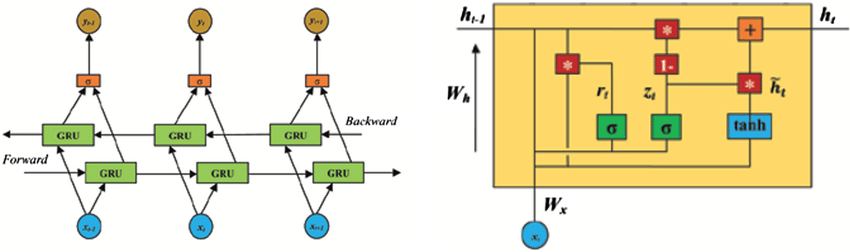

***I am Using BiDirectional GRU Here To Get Better Performence.Bidirectional Gated Recurrent Units (GRUs) are essential in natural language processing and sequence modeling tasks due to their ability to capture bidirectional dependencies in sequential data. Unlike traditional unidirectional models, which only process data in one direction (either forward or backward), bidirectional GRUs process input sequences in both directions simultaneously. This allows them to incorporate information from past and future context, enabling more comprehensive understanding and representation of the input sequence. By considering context from both directions, bidirectional GRUs excel in capturing long-range dependencies, especially in tasks where context plays a crucial role, such as sentiment analysis, machine translation, and named entity recognition. This bidirectional processing capability enhances model performance by capturing more nuanced relationships within the data, leading to improved accuracy and robustness in various sequence modeling tasks.***

- `model = Sequential()` initializes a sequential model, allowing layers to be added in sequence.

- The `Embedding` layer is added to the model. It is responsible for converting input integers (each representing a word index) into dense vectors of fixed size. This layer is essential for handling textual data.

- `Dropout` layer with a dropout rate of 0.5 is added next. Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.

- Two Bidirectional GRU layers are added sequentially. Bidirectional layers process the input sequence in both directions, allowing the model to capture information from past and future states. The `return_sequences=True` argument ensures that the output sequences are returned for each timestep.

- `BatchNormalization` layer is added to normalize the activations of the previous layer at each batch, aiding in faster and more stable training.

- Another Bidirectional GRU layer is added to capture bidirectional dependencies more effectively.

- The final `Dense` layer with 6 units (for 6 classes) and softmax activation function is added as the output layer for multi-class classification.

- The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

- `model.summary()` prints the summary of the model, displaying the architecture and parameter details.

In [36]:
# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_shape=(maxlen,)))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional GUR layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/Users/lejing/Desktop/nlpclass-1241-g-Fighting/project/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 79, 50)         │     2,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 79, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 79, 240)        │       123,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 79, 128)        │       117,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 79, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817,126 (10.75 MB)

 Trainable params: 2,816,870 (10.75 MB)

 Non-trainable params: 256 (1.00 KB)

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Fitting</p>

In [37]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5


 62/223 ━━━━━━━━━━━━━━━━━━━━ 6:18 2s/step - accuracy: 0.4115 - loss: 1.4779

KeyboardInterrupt: 

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Visualizing Results</p>

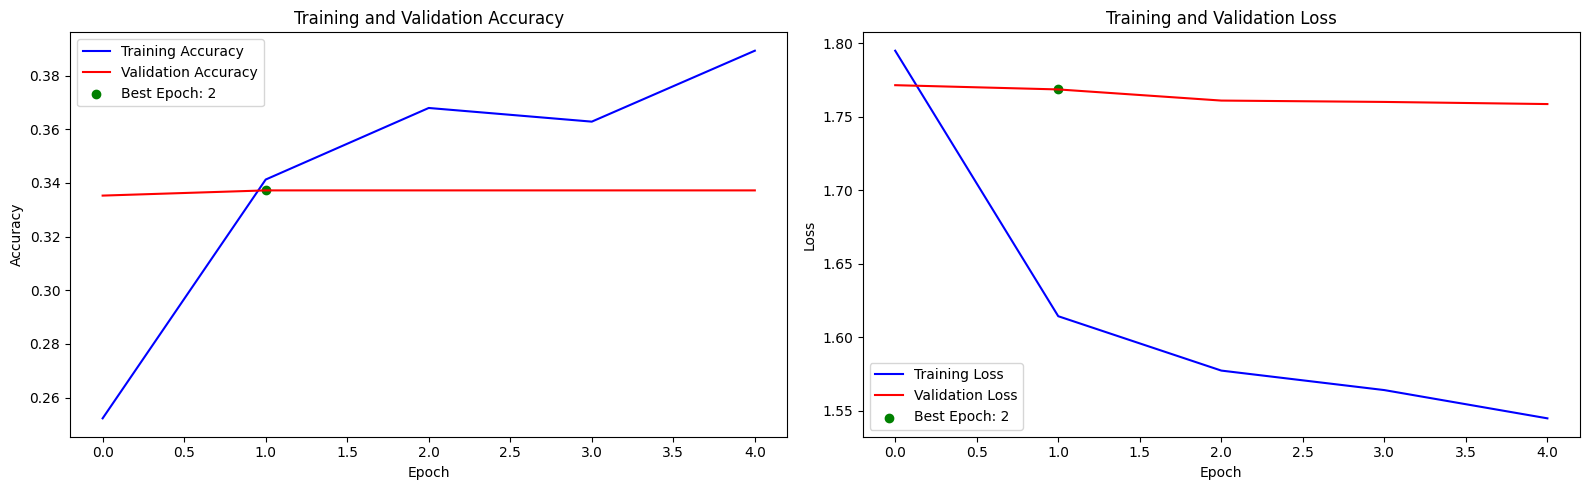

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Test Accuracy</p>

In [ ]:
# Evaluate Test Data 
model.evaluate(X_test_padded, y_test)

2606/2606 [==============================] - 31s 12ms/step - loss: 0.0943 - accuracy: 0.9358


[0.09433487057685852, 0.9358460903167725]

In [ ]:
# Evaluate Test Data 
model.evaluate(X_test_padded, y_test)
# Predictions On Test For Confustion Matrix 
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

2606/2606 [==============================] - 27s 10ms/step


<Axes: >

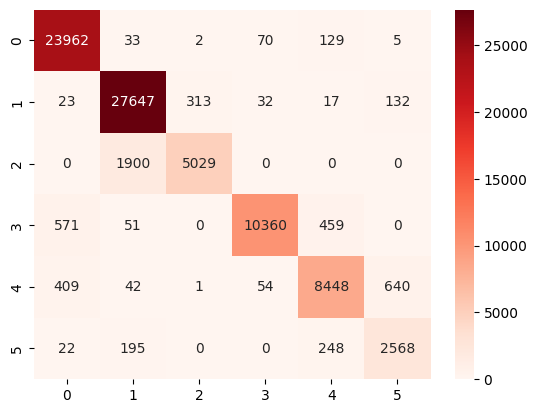

In [ ]:
# Evaluate Test Data 
model.evaluate(X_test_padded, y_test)
# Predictions On Test For Confustion Matrix 
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">The End</p>